testi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "household_power_consumption.txt"
df = pd.read_csv(path,delimiter=";",dtype="str")

In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000


In [4]:
#Combine date and time
df["datetime"] = pd.to_datetime(df["Date"]+" "+df["Time"])
#Convert other columns to numeric
df["Global_active_power"] = pd.to_numeric(df["Global_active_power"],errors="coerce")
df["Global_reactive_power"] = pd.to_numeric(df["Global_reactive_power"],errors="coerce")
df["Voltage"] = pd.to_numeric(df["Voltage"],errors="coerce")
df["Global_intensity"] = pd.to_numeric(df["Global_intensity"],errors="coerce")
df["Sub_metering_1"] = pd.to_numeric(df["Sub_metering_1"],errors="coerce")
df["Sub_metering_2"] = pd.to_numeric(df["Sub_metering_2"],errors="coerce")
df["Sub_metering_3"] = pd.to_numeric(df["Sub_metering_3"],errors="coerce")


#Timestamp rounded to floor hour
df["timestamp"] = df["datetime"].dt.floor("h")

# Interpolate missing values for short gaps up to 60 minutes
numeric_cols = df.select_dtypes(include=["number"]).columns
df.set_index("datetime",inplace=True)
df[numeric_cols] = df[numeric_cols].interpolate(method="time", limit=60)


df.head()

C:\Users\veeti\AppData\Local\Temp\ipykernel_6856\3628566196.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["datetime"] = pd.to_datetime(df["Date"]+" "+df["Time"])


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,timestamp
datetime,,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:00:00
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:00:00
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:00:00
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:00:00
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:00:00


In [ ]:
df

# Resample to hourly data by taking mean of each hour
df_hourly = df.resample("h").agg({
    "Global_active_power": "mean",
    "Global_reactive_power": "mean",
    "Global_intensity": "mean",
    "Voltage": "mean",
    "Global_intensity": "mean",
    "Sub_metering_1": "mean",
    "Sub_metering_2": "mean",
    "Sub_metering_3": "mean"
})

df_hourly

,Global_active_power,Global_reactive_power,Global_intensity,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,18.100000,234.643889,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,15.600000,234.580167,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,14.503333,233.232500,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,13.916667,234.071500,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,13.046667,237.158667,0.0,0.416667,17.216667
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,0.061400,7.216667,237.069667,0.0,0.000000,12.866667
2010-11-26 18:00:00,1.573467,0.053700,6.620000,237.531833,0.0,0.000000,0.000000
2010-11-26 19:00:00,1.659333,0.060033,7.056667,236.741000,0.0,0.066667,0.000000


In [6]:
# Fill remaining missing values using weekly seasonality
df_hourly = df_hourly.fillna(df_hourly.shift(freq="168h"))
df_hourly
isna_counts = df_hourly.isna().sum()
print(isna_counts)
df_hourly


Global_active_power      0
Global_reactive_power    0
Global_intensity         0
Voltage                  0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


,Global_active_power,Global_reactive_power,Global_intensity,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,18.100000,234.643889,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,15.600000,234.580167,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,14.503333,233.232500,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,13.916667,234.071500,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,13.046667,237.158667,0.0,0.416667,17.216667
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,0.061400,7.216667,237.069667,0.0,0.000000,12.866667
2010-11-26 18:00:00,1.573467,0.053700,6.620000,237.531833,0.0,0.000000,0.000000
2010-11-26 19:00:00,1.659333,0.060033,7.056667,236.741000,0.0,0.066667,0.000000


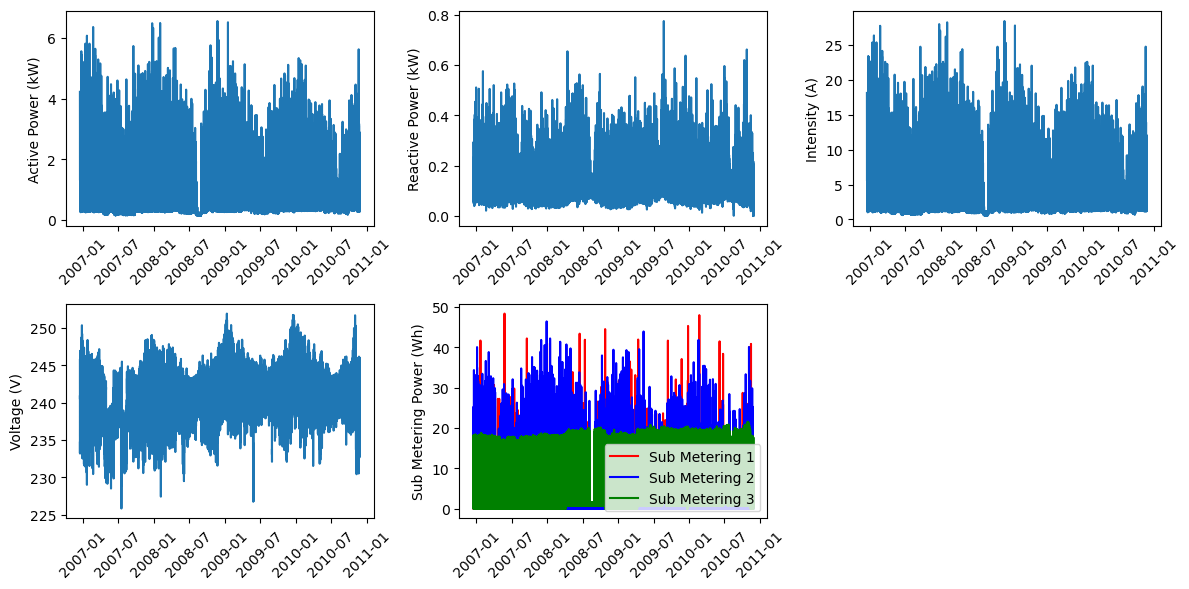

In [7]:
# Visualize the data, 2x3 grid of plots
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

axs[0, 0].plot(df_hourly.index, df_hourly["Global_active_power"])
axs[0, 0].set_ylabel("Active Power (kW)")

axs[0, 1].plot(df_hourly.index, df_hourly["Global_reactive_power"])
axs[0, 1].set_ylabel("Reactive Power (kW)")

axs[0, 2].plot(df_hourly.index, df_hourly["Global_intensity"])
axs[0, 2].set_ylabel("Intensity (A)")

axs[1, 0].plot(df_hourly.index, df_hourly["Voltage"])
axs[1, 0].set_ylabel("Voltage (V)")

axs[1, 1].plot(df_hourly.index, df_hourly["Sub_metering_1"], label="Sub Metering 1", color="red")
axs[1, 1].plot(df_hourly.index, df_hourly["Sub_metering_2"], label="Sub Metering 2", color="blue")
axs[1, 1].plot(df_hourly.index, df_hourly["Sub_metering_3"], label="Sub Metering 3", color="green")
axs[1, 1].set_ylabel("Sub Metering Power (Wh)")
axs[1, 1].legend(loc="lower right")

axs[1, 2].axis('off')  

for ax in axs.flat:
    ax.tick_params(axis='x', rotation=45,)

plt.tight_layout()
plt.show()